In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [2]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'


In [3]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [4]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [5]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [6]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [7]:
print(test)
print(test['image'])

                              image     label
0       images/test\angry\10052.jpg     angry
1       images/test\angry\10065.jpg     angry
2       images/test\angry\10079.jpg     angry
3       images/test\angry\10095.jpg     angry
4       images/test\angry\10121.jpg     angry
...                             ...       ...
7061  images/test\surprise\9806.jpg  surprise
7062  images/test\surprise\9830.jpg  surprise
7063  images/test\surprise\9853.jpg  surprise
7064  images/test\surprise\9878.jpg  surprise
7065   images/test\surprise\993.jpg  surprise

[7066 rows x 2 columns]
0         images/test\angry\10052.jpg
1         images/test\angry\10065.jpg
2         images/test\angry\10079.jpg
3         images/test\angry\10095.jpg
4         images/test\angry\10121.jpg
                    ...              
7061    images/test\surprise\9806.jpg
7062    images/test\surprise\9830.jpg
7063    images/test\surprise\9853.jpg
7064    images/test\surprise\9878.jpg
7065     images/test\surprise\993.jpg
Name:

In [8]:
from tqdm.notebook import tqdm

In [9]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [10]:
train_features = extract_features(train['image']) 

  0%|          | 0/28821 [00:00<?, ?it/s]

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [11]:
test_features = extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [12]:
x_train = train_features/255.0
x_test = test_features/255.0

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [15]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [16]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [17]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 10, validation_data = (x_test,y_test))

Epoch 1/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 219s 951ms/step - accuracy: 0.2329 - loss: 1.8344 - val_accuracy: 0.2583 - val_loss: 1.8142
Epoch 2/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 260s 1s/step - accuracy: 0.2470 - loss: 1.8079 - val_accuracy: 0.2528 - val_loss: 1.7641
Epoch 3/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 284s 1s/step - accuracy: 0.2794 - loss: 1.7420 - val_accuracy: 0.3555 - val_loss: 1.6144
Epoch 4/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 283s 1s/step - accuracy: 0.3554 - loss: 1.6279 - val_accuracy: 0.4322 - val_loss: 1.4631
Epoch 5/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 286s 1s/step - accuracy: 0.4056 - loss: 1.5192 - val_accuracy: 0.4544 - val_loss: 1.3978
Epoch 6/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 271s 1s/step - accuracy: 0.4363 - loss: 1.4572 - val_accuracy: 0.4858 - val_loss: 1.3287
Epoch 7/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 280s 1s/step - accuracy: 0.4619 - loss: 1.4074 - val_accuracy: 0.5064 - val_loss: 1.2906
Epoch 8/10
226/226 ━━━━━━━━━━━━━━━━━━━━ 283s 1s/step - accuracy: 0.4724 - loss: 1.3733 - val_a

In [24]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("facialemotionmodel.keras")

In [25]:
from keras.models import model_from_json

In [1]:
from keras.models import load_model

model = load_model("facialemotionmodel.keras")

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [2]:
from keras.models import load_model

# Load the model
model = load_model("facialemotionmodel.keras")

# Recompile the model with a new optimizer
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [3]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [4]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [9]:
from tensorflow.keras.preprocessing.image import load_img
import numpy as np

def ef(image):
    img = load_img(image, color_mode='grayscale')
    feature = np.array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

# Example usage
image = 'images/train/happy/67.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("Predicted label:", pred_label)

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
Predicted label: happy


     ---------------------------------------- 0.0/167.9 kB ? eta -:--:--
     --------- --------------------------- 41.0/167.9 kB 991.0 kB/s eta 0:00:01
     -------------------------------------  163.8/167.9 kB 2.4 MB/s eta 0:00:01
     -------------------------------------- 167.9/167.9 kB 2.0 MB/s eta 0:00:00
   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
    --------------------------------------- 0.2/7.8 MB 11.5 MB/s eta 0:00:01
   -- ------------------------------------- 0.5/7.8 MB 5.6 MB/s eta 0:00:02
   --- ------------------------------------ 0.7/7.8 MB 5.9 MB/s eta 0:00:02
   ----- ---------------------------------- 1.1/7.8 MB 6.1 MB/s eta 0:00:02
   ------ --------------------------------- 1.3/7.8 MB 5.7 MB/s eta 0:00:02
   ------- -------------------------------- 1.4/7.8 MB 5.4 MB/s eta 0:00:02
   -------- ------------------------------- 1.6/7.8 MB 5.1 MB/s eta 0:00:02
   --------- ------------------------------ 1.8/7.8 MB 5.0 MB/s eta 0:00:02
   ------


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


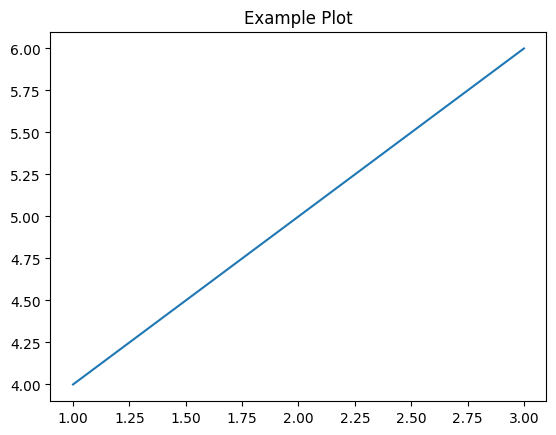

In [11]:
# Install matplotlib
!pip install matplotlib

# Import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Example plot
plt.plot([1, 2, 3], [4, 5, 6])
plt.title("Example Plot")
plt.show()

original image is of happy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
model prediction is  happy


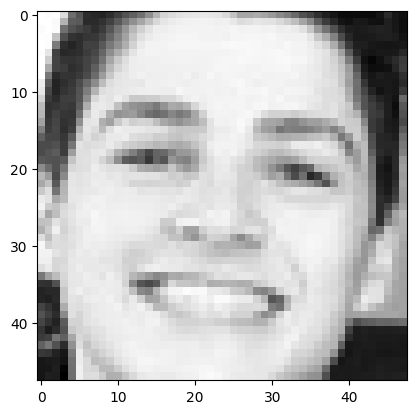

In [12]:
image = 'images/train/happy/67.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
model prediction is  neutral


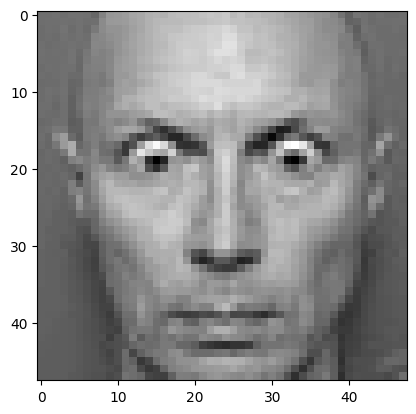

In [13]:
image = 'images/train/surprise/15.jpg'
print("original image is of surprise")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')